In [1]:
# dependencies and packages
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load cleaned 311csv
x311_df = pd.read_csv('../resources/311data.csv', low_memory=False)

In [33]:
#create complaints df with zip code
complaints_df = pd.DataFrame ({
    "complaints": x311_df["SR Location Zip Code"].value_counts()
})

In [34]:
#load translation table, create df with zipcode and sum of population, convert datatype for merge
tract_df = pd.read_csv('../resources/tract_to_zip.csv', low_memory=False)\
.dropna(how='any').astype(int).drop("tract", axis=1).groupby("zip")["population"].sum().to_frame()

In [35]:
# create df with first merge - complaints and population
first_df = complaints_df.merge(tract_df, left_index=True, right_on = "zip")
first_df.head(5)

,complaints,population
zip,,
78701,3126,7925
78704,1992,48457
78703,685,22372
78705,626,34230
78702,614,22690


In [38]:
# complaints per capita calculaton
per_cap = first_df["complaints"]/first_df["population"]
per_cap

zip
78701    0.394448
78704    0.041109
78703    0.030619
78705    0.018288
78702    0.027060
78746    0.013078
78741    0.005448
78723    0.003870
78756    0.012893
78751    0.009341
78757    0.003267
78754    0.005013
78745    0.000849
78758    0.000780
78722    0.007619
78731    0.001239
78752    0.001449
78753    0.000447
78721    0.001403
78748    0.000275
78744    0.000268
78759    0.000224
78747    0.000360
78724    0.000333
78749    0.000155
78717    0.000166
78727    0.000158
78735    0.000113
78725    0.000212
78726    0.000067
78617    0.000060
78739    0.000035
78736    0.000062
78719    0.000358
78728    0.000051
78750    0.000037
dtype: float64

In [39]:
#assign per capita calculation to new df
second_df = first_df.assign(percapita = per_cap)
second_df.head(5)

,complaints,population,percapita
zip,,,
78701,3126,7925,0.394448
78704,1992,48457,0.041109
78703,685,22372,0.030619
78705,626,34230,0.018288
78702,614,22690,0.027060


In [40]:
#load mobility csv
mobility_df = pd.read_csv('../resources/mobilitydata.csv', low_memory=False)
mobility_df.head(5)

,zip,endpoints
0,78701,3378485
1,78705,2083239
2,78704,1100282
3,78702,717938
4,78703,430475


In [41]:
#merge ride endpoint data into combined df
comb_df = second_df.merge(mobility_df, left_index=True, right_on = "zip")
comb_df.head(5)

,complaints,population,percapita,zip,endpoints
0,3126,7925,0.394448,78701,3378485
2,1992,48457,0.041109,78704,1100282
4,685,22372,0.030619,78703,430475
1,626,34230,0.018288,78705,2083239
3,614,22690,0.027060,78702,717938


In [45]:
plot_df = comb_df.head(20)

In [46]:
plot_df

,complaints,population,percapita,zip,endpoints
0,3126,7925,0.394448,78701,3378485
2,1992,48457,0.041109,78704,1100282
4,685,22372,0.030619,78703,430475
1,626,34230,0.018288,78705,2083239
3,614,22690,0.027060,78702,717938
8,478,36550,0.013078,78746,58333
5,286,52499,0.005448,78741,234894
6,134,34627,0.003870,78723,79036
9,133,10316,0.012893,78756,55332
7,132,14132,0.009341,78751,68776


In [64]:
per_endpoint = comb_df["complaints"]/comb_df["endpoints"]
comb_df = comb_df.assign(perendpoint = per_endpoint)
comb_df

,complaints,population,percapita,zip,endpoints,perendpoint
0,3126,7925,0.394448,78701,3378485,0.000925
2,1992,48457,0.041109,78704,1100282,0.001810
4,685,22372,0.030619,78703,430475,0.001591
1,626,34230,0.018288,78705,2083239,0.000300
3,614,22690,0.027060,78702,717938,0.000855
8,478,36550,0.013078,78746,58333,0.008194
5,286,52499,0.005448,78741,234894,0.001218
6,134,34627,0.003870,78723,79036,0.001695
9,133,10316,0.012893,78756,55332,0.002404
7,132,14132,0.009341,78751,68776,0.001919


In [97]:
plot_df = comb_df.head(15)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

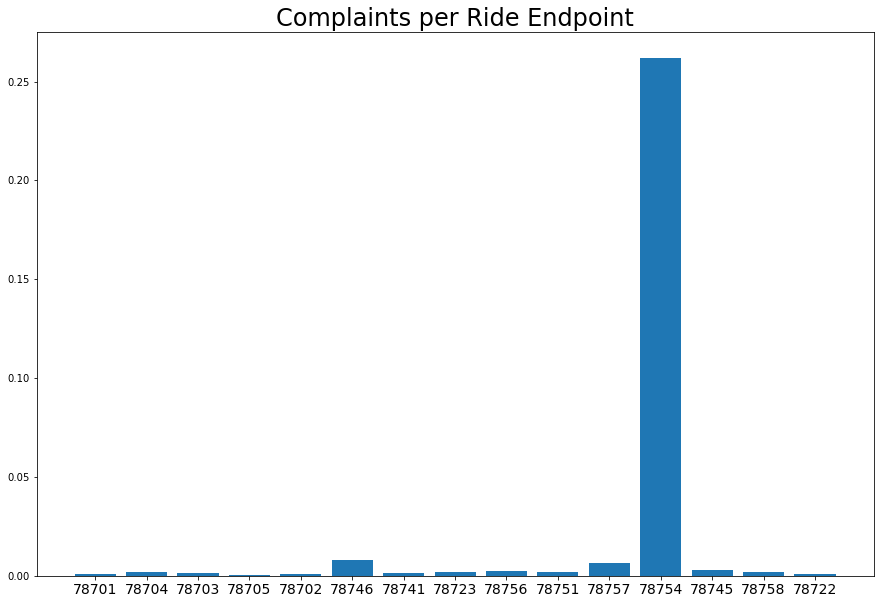

In [118]:
plt.bar(plot_df["zip"].astype(str), plot_df["perendpoint"])
plt.title("Complaints per Ride Endpoint")
plt.rcParams["figure.figsize"] = (15,10)
plt.xticks(size=14)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

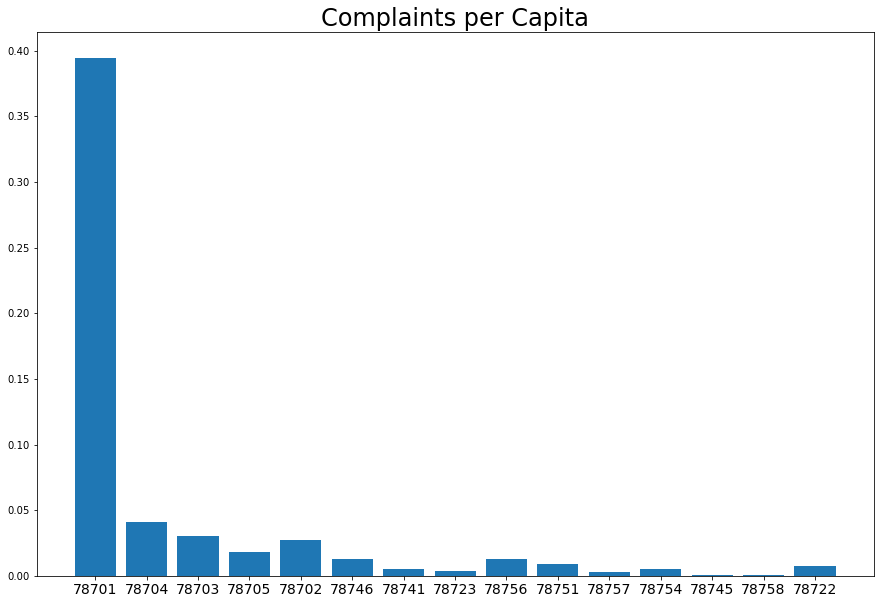

In [119]:
plt.bar(plot_df["zip"].astype(str), plot_df["percapita"])
plt.title("Complaints per Capita")
plt.rcParams["figure.figsize"] = (15,10)
plt.xticks(size=14)